# Heart disease prediction - Artificial Neural network

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
import os
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\AAA\Desktop\Projects and Researchs\JiT Research\2021\Heart disease and brain stroke\Heart disease/heart12.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Corelation

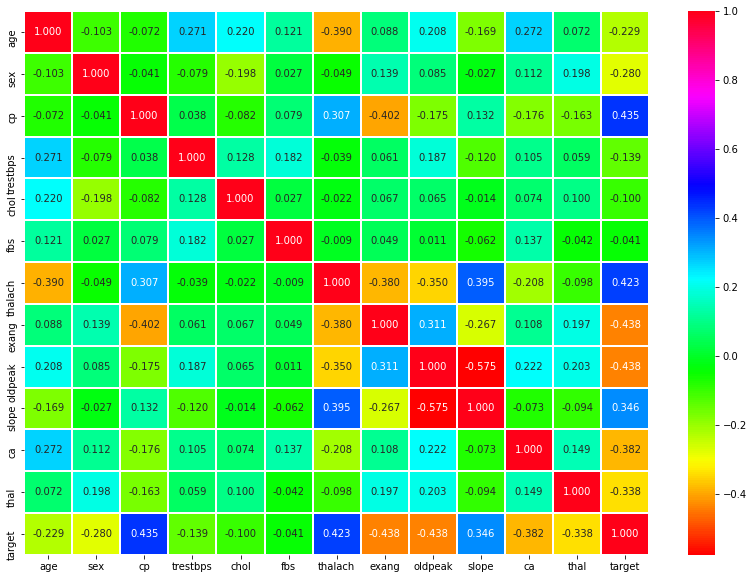

In [4]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0


In [6]:
X = df.drop(['target'], axis = 1)
y = df.target.values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [27]:
import tensorflow as tf

In [33]:
c_y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
c_y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

## Importing the Keras libraries and packages

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

##  ANN

In [34]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
#classifier.add(Dense(output_dim = 11, init = 'uniform', activation = 'relu', input_dim = 22))

# Adding the second hidden layer
classifier.add(Dense(64, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(2, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
classifier.fit(X_train, c_y_train, batch_size = 128, epochs = 100, validation_data=(X_test, c_y_test), shuffle = True)

Epoch 1/100
7/7 [==============================] - 1s 37ms/step - loss: 0.7071 - accuracy: 0.5037 - val_loss: 0.6617 - val_accuracy: 0.6049
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6570 - accuracy: 0.6207 - val_loss: 0.6196 - val_accuracy: 0.6341
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6267 - accuracy: 0.6256 - val_loss: 0.5827 - val_accuracy: 0.6976
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6057 - accuracy: 0.6671 - val_loss: 0.6030 - val_accuracy: 0.6341
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6074 - accuracy: 0.6561 - val_loss: 0.5447 - val_accuracy: 0.7268
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.5830 - accuracy: 0.6963 - val_loss: 0.5384 - val_accuracy: 0.7561
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.5775 - accuracy: 0.6927 - val_loss: 0.5328 - val_accuracy: 0.7463
Epoch 8/100
7/7 [=======

7/7 [==============================] - 0s 5ms/step - loss: 0.3911 - accuracy: 0.8354 - val_loss: 0.3196 - val_accuracy: 0.8634
Epoch 60/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3756 - accuracy: 0.8451 - val_loss: 0.3229 - val_accuracy: 0.8585
Epoch 61/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3883 - accuracy: 0.8341 - val_loss: 0.3070 - val_accuracy: 0.8780
Epoch 62/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3725 - accuracy: 0.8451 - val_loss: 0.3062 - val_accuracy: 0.8732
Epoch 63/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3676 - accuracy: 0.8451 - val_loss: 0.3076 - val_accuracy: 0.8829
Epoch 64/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3672 - accuracy: 0.8549 - val_loss: 0.3110 - val_accuracy: 0.8634
Epoch 65/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3748 - accuracy: 0.8415 - val_loss: 0.3038 - val_accuracy: 0.8927
Epoch 66/100
7/7 [===============

In [36]:
import scikitplot as skplt
rdf_prob = classifier.predict(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

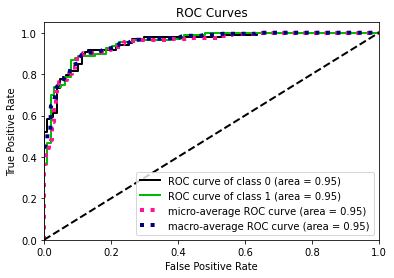

In [37]:
skplt.metrics.plot_roc(y_test, rdf_prob)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
y_pred_single = []

for i in y_pred:
    y_pred_single.append(np.argmax(i))

In [40]:
y_pred_single = np.array(y_pred_single)

In [41]:
y_pred_single = y_pred_single.reshape(-1,1)

In [42]:
classifier.save("heart12ANN.h5")

accuracy of the model:  0.8926829268292683


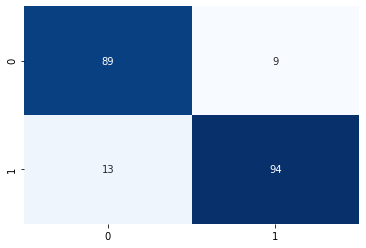

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_single.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred_single.round())
print('accuracy of the model: ',ac)